[View in Colaboratory](https://colab.research.google.com/github/ArjunGajmer/Assignment-ML/blob/master/Assignment16(ensemble).ipynb)

# Ensemble Model

## Importing Dataset

In [0]:
import pandas as pd
from sklearn import datasets

In [0]:
df=datasets.load_wine()

In [111]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [112]:
df.data.shape

(178, 13)

In [113]:
df.target.shape

(178,)

In [114]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [115]:
print(df.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

## Data Preprocessing

In [116]:
X=pd.DataFrame(df.data)
X.shape

(178, 13)

In [117]:
Y=pd.DataFrame(df.target)
Y.shape

(178, 1)

## Splitting Dataset

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=8)

## Working on various ensemble models 

In [0]:
from sklearn.ensemble import *

## Bagging Tree

In [0]:
bag=BaggingClassifier()

In [122]:
bag.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [0]:
bag_predict=bag.predict(x_test)

In [0]:
import sklearn.metrics as met

In [125]:
bag_accuracy=met.accuracy_score(y_test,bag_predict)
print('Accuracy: ',bag_accuracy)

Accuracy:  0.9629629629629629


## Random Forest 

In [0]:
rf=RandomForestClassifier()

In [127]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rf_predict=rf.predict(x_test)

In [129]:
rf_accuracy=met.accuracy_score(y_test,rf_predict)
print('Accuracy: ',rf_accuracy)

Accuracy:  1.0


## Stochastic Gradient Boosting Classification

In [0]:
gbc=GradientBoostingClassifier()

In [131]:
gbc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [0]:
gbc_predict=gbc.predict(x_test)

In [133]:
gbc_accuracy=met.accuracy_score(y_test,gbc_predict)
print('Accuracy: ',gbc_accuracy)

Accuracy:  0.9629629629629629


## Voting Ensemble (Decision Tree, Logistic Regression, SVM)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
vc=VotingClassifier([('tree',DecisionTreeClassifier()),('log',LogisticRegression()),('svm',SVC())])

In [136]:
vc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [137]:
vc_predict=vc.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
vc_accuracy=met.accuracy_score(y_test,vc_predict)
print('Accuracy: ',vc_accuracy)

Accuracy:  0.8703703703703703


## Comparaing Score

In [139]:
model=['Bagged Decision Trees','Random Forest Classification','Stochastic Gradient Boosting','Voting Ensemble']
score=[bag_accuracy,rf_accuracy,gbc_accuracy,vc_accuracy]
compare=pd.DataFrame({'Model':model,'Score':score})
compare

,Model,Score
0,Bagged Decision Trees,0.962963
1,Random Forest Classification,1.000000
2,Stochastic Gradient Boosting,0.962963
3,Voting Ensemble,0.870370


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


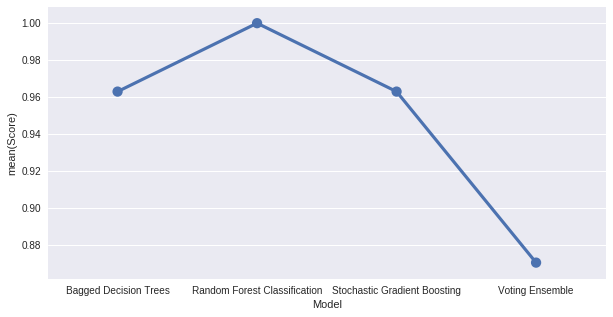

In [141]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Model',y='Score',data=compare)
plt.show()


We can that the accuracy score of Random Forst Classification is highest ,whereas voting ensemble model's accuracy is lowest .